EDUCATIONAL DATA ANALYTICS PROJECT
Shubham Kumar (16CE30018)
Sobit Singh (16CE30019)

In [28]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
#######   Loading  Data ######
train_data = pd.read_csv("fashion-mnist_train.csv")
test_data = pd.read_csv("fashion-mnist_test.csv")


In [30]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
test_data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
train_data.shape

(60000, 785)

In [32]:
test_data.shape

(10000, 785)

In [33]:
y_train = train_data['label']
y_test = test_data['label']

In [34]:
train_data.drop(['label'],axis=1,inplace= True)
x_train = pd.DataFrame(train_data)
test_data.drop(['label'],axis=1,inplace= True)
x_test = pd.DataFrame(test_data)

In [35]:
x_train = x_train/255
x_test = x_test/255

In [36]:
y_train.shape

(60000,)

In [37]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [38]:
type(x_train)

pandas.core.frame.DataFrame

In [39]:
x_train = x_train.values
x_test = x_test.values

In [40]:
type(x_train)

numpy.ndarray

In [41]:
x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))


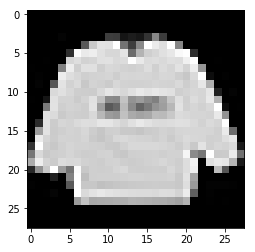

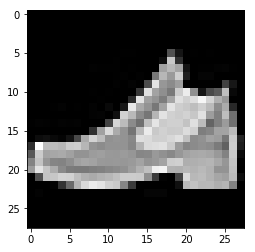

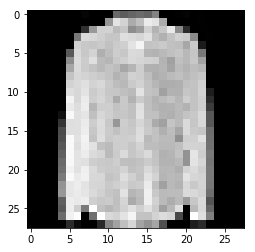

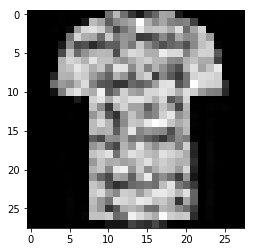

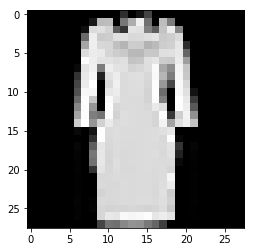

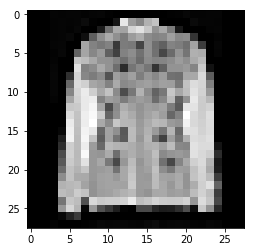

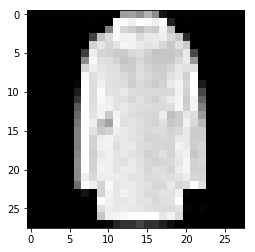

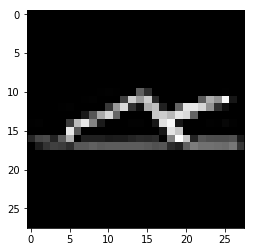

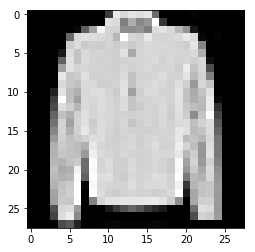

In [89]:
for i in range(9):
    plt.imshow(x_train[i].reshape((28, 28)),cmap = 'gray')
    plt.show()

In [70]:
x_train.shape

(60000, 28, 28, 1)

In [43]:
batch_size = 256
num_classes = 10
epochs = 30
input_shape =(28,28,1)

#input image dimensions
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss= 'categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               147584    
__________

In [45]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)


Epoch 1/30
60000/60000 [==============================] - 9s 157us/step - loss: 0.5746 - acc: 0.7890
Epoch 2/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.3582 - acc: 0.8703
Epoch 3/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.3077 - acc: 0.8880
Epoch 4/30
60000/60000 [==============================] - 8s 125us/step - loss: 0.2736 - acc: 0.9001
Epoch 5/30
60000/60000 [==============================] - 7s 125us/step - loss: 0.2511 - acc: 0.9088
Epoch 6/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.2342 - acc: 0.9136
Epoch 7/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.2160 - acc: 0.9210
Epoch 8/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.2019 - acc: 0.9262
Epoch 9/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.1820 - acc: 0.9338
Epoch 10/30
60000/60000 [==============================] - 7s 124us/step - loss: 0.1677 - a

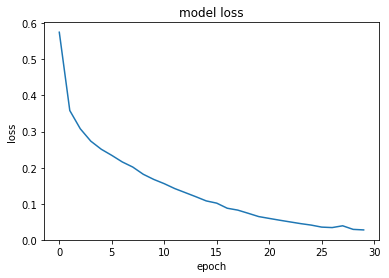

In [49]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [91]:
predicted_classes = model.predict_classes(x_test)

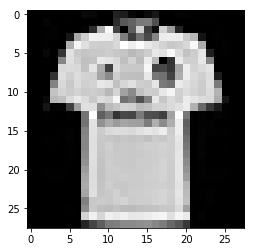

In [78]:
plt.imshow(x_test[0].reshape((28, 28)),cmap = 'gray')

In [94]:
predicted_classes[0]

0

In [52]:
 model.evaluate(x_test, y_test, verbose=0)

[0.45723606624230745, 0.9067]

In [95]:
predicted_classes[1]

1

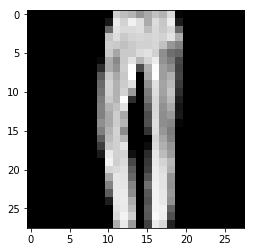

In [96]:
plt.imshow(x_test[1].reshape((28, 28)),cmap = 'gray')